In [1]:
import sys
sys.path.append('..')
# %matplotlib notebook
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt
from core import Core

# from global_var import COLORS


In [2]:
print(COLORS)
COLORS.append('#44DD55')

NameError: name 'COLORS' is not defined

In [ ]:
COLORS += COLORS

In [3]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [4]:
count = 10
COLORS = plt.cm.rainbow(np.linspace(0,1,count))


In [83]:
folder = r'C:\SPRUP_data_Jenda\2021_09_15_noise/'.replace('\\', '/')


for i in range(8, count + 1):
    print(i)    
    name = 'raw_{:02d}_3'.format(i)
    core = Core(folder, name)
    core.k = 10

    core.type = 'raw'
    core_raw_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_raw_int = [np.average(core.frame(i)) for i in range(len(core))]


    core.type = 'diff'
    core_diff_std = [np.std(core.frame(i)) for i in range(len(core))]
    core_diff_int = [np.average(np.abs(core.frame(i))) for i in range(len(core))]
    
    np.save(folder + name + '_raw_int' + '.npy', core_raw_int)
    np.save(folder + name + '_raw_std' + '.npy', core_raw_std)
    
    np.save(folder + name + '_diff_int' + '.npy', core_diff_int)
    np.save(folder + name + '_diff_std' + '.npy', core_diff_std)
    
    np.save(folder + name + '_time' + '.npy', core._time_info[:,0])
    
    std = np.std(core._data_raw, axis = 2)
    np.save(folder + name + '_raw_std_px' + '.npy', np.average(std))

8
core 3: SPR file not found. Diseable ploting of SPR. 
9
core 3: SPR file not found. Diseable ploting of SPR. 
10
core 3: SPR file not found. Diseable ploting of SPR. 


In [5]:
area = 1936 * 1216


In [6]:
folder = r'C:\SPRUP_data_Jenda\2021_09_15_noise/'.replace('\\', '/')



frame_time = [0.1046, 0.1046, 0.1046, 0.1046, 0.1046, 0.1046, 0.1046, 0.1307, 0.1046, 0.1046]
frame_time = [f*10 for f in frame_time] # per 100 ms

ets = [12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 1, 12.5, 12.5]
avg = [8, 8, 8, 8, 8, 8, 8, 10, 8, 8]
ma = [58.0] * 5 + [60.9, 56.5, 66.6, 61.1, 61.1] 
des = [
    'TM, air',
    'TM, run',
    'TM, stopped',
    'TE, stopped',
    'TE, run',
    'TM, run',
    'TM, run',
    'TM, run',
    'TM, run',
    'TM, stopped'
      ]



raw_int = []
raw_std = []
raw_std_px = []


diff_int = []
diff_std = []
time = []

depth = 32700

for i in range(1, count + 1):
    name = 'raw_{:02d}_3'.format(i)
    raw_int.append(np.load(folder + name + '_raw_int' + '.npy')*depth)
    raw_std.append(np.load(folder + name + '_raw_std' + '.npy')*depth)
    raw_std_px.append(np.load(folder + name + '_raw_std_px' + '.npy')*depth)
    
    
    diff_std.append(np.load(folder + name + '_diff_std' + '.npy')*depth)
    diff_int.append(np.load(folder + name + '_diff_int' + '.npy')*depth)
    time.append(np.load(folder + name + '_time' + '.npy'))    
    
    


In [7]:
correction = [frame_time[i] / ets[i] / avg[i] * 1000 for i in range(count)]
intensity = [np.average(raw_int[i])*avg[i]/frame_time[i] for i in range(count)]
e_count = [np.average(raw_int[i]) for i in range(count)]

print(intensity)
print(correction)
print(e_count)

[112363.04229609364, 24334.998504870433, 24242.665703688264, 112340.05225042561, 112614.24853515162, 59774.79501203948, 17276.127195599154, 37654.25658976706, 67572.62520066336, 66694.38990467305]
[10.46, 10.46, 10.46, 10.46, 10.46, 10.46, 10.46, 130.70000000000002, 10.46, 10.46]
[14691.467780214243, 3181.801054511809, 3169.728540757241, 14688.461831743149, 14724.312995971075, 7815.554447824163, 2258.8536308245893, 4921.411336282555, 8835.120744986734, 8720.291480036001]


In [8]:
print([int((e*avg[i]**-1)**0.5) for i, e in enumerate(e_count)])
print([int(r) for r in raw_std_px])

[42, 19, 19, 42, 42, 31, 16, 22, 33, 33]
[83, 27, 31, 69, 63, 55, 19, 256, 61, 57]


1.0897228187523282
1.1199223180605502
1.2158753463376326
14.400205142982133
1.453555634874564
[1.9261976040228483, 1.6295675796638338, 1.0385939464010234, 2.276834600918538, 1.0]
[1.9777081323752643, 1.6663634600857957, 1.0632278602102097, 1.1984127073802482, 1.0]
[1.2397345219153126, 1.2384626084962833, 1.0210279034496448, 7.474232918817171, 1.0]
--------------------
[0.002699955759469451, 0.002284168749337657, 0.0014557996030516746, 0.0031914444713619402, 0.001401702376656795]
[0.007438938380373336, 0.006267848574802663, 0.0039992182905678525, 0.0045077016868768525, 0.003761393432426772]
[0.008656619326332712, 0.008647738013366142, 0.007129469838487681, 0.0521898745181226, 0.006982639567831647]
[0.003217828903899265, 0.002844405247476945, 0.0020611140425404843, 0.059560748464074324, 0.00272484655921888]


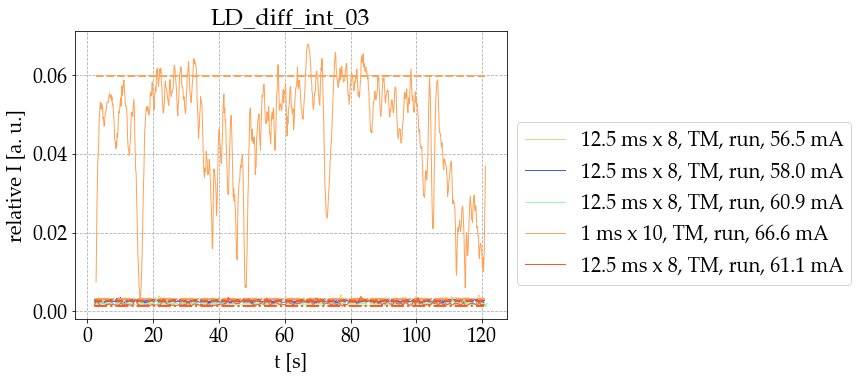

In [13]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')

title = 'LD_diff_int_03'
axes.set_title(title)
axes.set_xlabel('t [s]')
# axes.set_ylabel('std [a. u.]')
# axes.set_ylabel('I [a. u.]')
axes.set_ylabel('relative I [a. u.]')



ii = []
levels = []
effective_noise_levels = []
nsr = []
nsr_std = []

for i in [7, 2, 6, 8, 9]:
    i -= 1
    
#     if i == 0:
#         variable = diff_int[i][20:]/e_count[1]
#     else:
        
    variable = diff_int[i][20:]/e_count[i]
#     variable = diff_std[i][20:]/e_count[i]
    

    
    axes.plot(
        time[i][20:], 
        variable, 
        linewidth=1, 
        label = '{} ms x {}, {}, {} mA'.format(ets[i], avg[i], des[i], ma[i]), 
#         label = '{} ms x {}, {}'.format(ets[i], avg[i], des[i]), 
        
        color = COLORS[i]
    )
    
    level = np.min(variable)
    
    variable_sorted = np.sort(variable)
    
    effective_noise_levels.append(variable_sorted[int(np.round(0.9*len(variable)))-1])
    
    
    
    
    
    level_avg = np.average(variable)
    
    print(level_avg/level)
    
    levels.append(level)
#     nsr.append(1/(e_count[i])**0.5)


    nsr.append((1/e_count[i]/avg[i])**0.5)
    
    nsr_std.append(raw_std_px[i]/e_count[i])
    
    axes.plot(
        time[i][20:], 
        effective_noise_levels[-1] * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '--', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
        
    axes.plot(
        time[i][20:], 
        level * np.ones(len(time[i][20:])),      
        linewidth=2, 
        ls = '-.', 
#         label = '{} ms x {}, {} mA, norm'.format(ets[i], avg[i], ma[i]), 
        color = COLORS[i]
    )
    

    
    ii.append(i)
    
print([l/levels[-1] for l in levels])
print([n/nsr[-1] for n in nsr])
print([n/nsr_std[-1] for n in nsr_std])

print('-'*20)

print(levels)
print(nsr)
print(nsr_std)
print(effective_noise_levels)

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# fig.savefig(folder + 'plots/' + title +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
